In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [58]:
rutas = ["datos_procesados_04-11.parquet","datos_procesados_12-18.parquet","datos_procesados_19-25.parquet"]

lista_dfs = []

for ruta in rutas:
    lista_dfs.append(pd.read_parquet(f"../data/{ruta}"))

In [59]:
for df in lista_dfs:
    print(df.columns)

Index(['id_estudiante', 'id_colegio_rbd', 'dependencia_colegio',
       'rama_educacional', 'situacion_egreso', 'cod_region', 'cod_comuna',
       'puntaje_lectora', 'puntaje_m1', 'puntaje_historia', 'puntaje_ciencias',
       'tipo_ciencia', 'promedio_notas', 'puntaje_nem', 'year_proceso'],
      dtype='object')
Index(['id_estudiante', 'id_colegio_rbd', 'dependencia_colegio',
       'rama_educacional', 'situacion_egreso', 'cod_region', 'cod_comuna',
       'promedio_notas', 'puntaje_nem', 'puntaje_lectora', 'puntaje_m1',
       'puntaje_historia', 'puntaje_ciencias', 'year_proceso',
       'puntaje_ranking'],
      dtype='object')
Index(['id_estudiante', 'id_colegio_rbd', 'year_proceso',
       'dependencia_colegio', 'situacion_egreso', 'rama_educacional',
       'cod_region', 'cod_comuna', 'promedio_notas', 'puntaje_nem',
       'puntaje_ranking', 'puntaje_lectora', 'puntaje_m1', 'puntaje_historia',
       'puntaje_ciencias', 'tipo_ciencia', 'puntaje_m2'],
      dtype='object')


In [60]:
mapa_renombre = {
        'ID_aux': 'id_estudiante',
        'RBD': 'id_colegio_rbd',
        'GRUPO_DEPENDENCIA': 'dependencia_colegio',
        'RAMA_EDUCACIONAL': 'rama_educacional',
        'SITUACION_EGRESO': 'situacion_egreso',
        'CODIGO_REGION': 'cod_region',
        'CODIGO_COMUNA': 'cod_comuna',
        'PROMEDIO_NOTAS': 'promedio_notas',
        'PTJE_NEM': 'puntaje_nem',
        'PTJE_RANKING': 'puntaje_ranking',
        'LENG_ACTUAL': 'puntaje_lectora',
        'CLEC_ACTUAL': 'puntaje_lectora',
        'CLEC_REG_ACTUAL': 'puntaje_lectora',

        'MATE_ACTUAL': 'puntaje_m1',
        'MATE1_REG_ACTUAL': 'puntaje_m1',

        'MATE2_REG_ACTUAL': 'puntaje_m2',

        'HCSO_ACTUAL': 'puntaje_historia',
        'HCSOC_REG_ACTUAL': 'puntaje_historia',

        'CIEN_ACTUAL': 'puntaje_ciencias',
        'CIEN_REG_ACTUAL': 'puntaje_ciencias',
        'MODULO_ACTUAL': 'tipo_ciencia',
        'MODULO_REG_ACTUAL': 'tipo_ciencia',
        'YEAR_PROCESO': 'year_proceso'
    }

    # Aplicamos el nuevo nombre de las columnas
lista_dfs[0].rename(columns=mapa_renombre, inplace=True)

In [61]:
mapa_dependencia = {
    1.0: 'Particular Pagado',
    2.0: 'Particular Subvencionado',
    3.0: 'Municipal',
    4.0: 'Servicio Local de Educación'
}

lista_dfs[0]['dependencia_colegio'] = lista_dfs[0]['dependencia_colegio'].map(mapa_dependencia)

In [62]:
lista_dfs[0]["promedio_notas"] = lista_dfs[0]["promedio_notas"] / 10

In [63]:
df = pd.concat(lista_dfs).reset_index(drop=True)

In [64]:
mapa_situacion = {
    1.0: "Act:Nacional-Regular",
    2.0: "Act:Nacional-V_Notas",
    3.0: "Act:Extranjero",
    4.0: "Act:Extranjero", # No nos vamos a meter temas tan especificos en cuanto la situacion de alumnos extranjeros
    5.0: "Ant:Nacional-Regular",
    6.0: "Ant:Nacional-V_Notas",
    7.0: "Ant:Extranjero",
    8.0: "Ant:Extranjero",
}

mapa_rama = {
    "H1": "CH diurno",
    "H2": "CH nocturno",
    "H3": "CH - validación de estudios",
    "H4": "CH - reconocimiento de estudios",
    "T1": "TP comercial",
    "T2": "TP industrial",
    "T3": "TP servicios y técnica",
    "T4": "TP agrícola",
    "T5": "TP marítima",
}

df["situacion_egreso"] = df["situacion_egreso"].map(mapa_situacion)
df["rama_educacional"] = df["rama_educacional"].map(mapa_rama)


df

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,426.0,None,6.30,682.0,2004,NaN,<NA>
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,<NA>,None,5.30,481.0,2004,NaN,<NA>
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,396.0,None,4.80,376.0,2004,NaN,<NA>
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,<NA>,None,4.80,373.0,2004,NaN,<NA>
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,<NA>,None,5.40,501.0,2004,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455232,id_5995599440825,9986.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126.0,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,2025,NaN,<NA>
5455233,id_4895488246247,NaN,NaN,CH - reconocimiento de estudios,Act:Extranjero,NaN,NaN,605.0,700.0,542.0,502.0,BIO,NaN,NaN,2025,NaN,<NA>
5455234,id_9866988747313,9140.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13122.0,746.0,589.0,<NA>,665.0,BIO,6.28,793.0,2025,856.0,362
5455235,id_5866598447255,2733.0,Municipal,CH diurno,Ant:Nacional-Regular,7.0,7301.0,<NA>,<NA>,<NA>,<NA>,NaN,5.68,622.0,2025,631.0,<NA>


In [65]:
psu = [x for x in range(2004, 2021)]
pdt = [2021, 2022]
paes = [x for x in range(2023,2026)]

df_PSU = df[df["year_proceso"].isin(psu)]
df_PDT = df[df["year_proceso"].isin(pdt)]
df_PAES = df[df["year_proceso"].isin(paes)]

display(df_PSU)
display(df_PDT)
display(df_PAES)

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,426.0,None,6.30,682.0,2004,NaN,<NA>
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,<NA>,None,5.30,481.0,2004,NaN,<NA>
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,396.0,None,4.80,376.0,2004,NaN,<NA>
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,<NA>,None,4.80,373.0,2004,NaN,<NA>
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,<NA>,None,5.40,501.0,2004,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050777,id_9999599479904,24482.0,Particular Subvencionado,TP industrial,Act:Nacional-Regular,13.0,13128.0,427.0,498.0,498.0,389.0,TEC,5.13,438.0,2020,438.0,<NA>
4050778,id_9999599479967,8618.0,Particular Subvencionado,CH diurno,Act:Nacional-Regular,13.0,13101.0,559.0,549.0,<NA>,542.0,QUI,5.80,580.0,2020,593.0,<NA>
4050779,id_9999599479973,20316.0,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,16.0,16101.0,407.0,415.0,477.0,446.0,QUI,5.30,477.0,2020,477.0,<NA>
4050780,id_9999599479977,14373.0,Particular Subvencionado,CH diurno,Act:Nacional-Regular,5.0,5601.0,380.0,332.0,451.0,<NA>,NaN,5.20,451.0,2020,451.0,<NA>


,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2
4050782,id_0000900070018,25418.0,Particular Subvencionado,TP servicios y técnica,Ant:Nacional-Regular,13.0,13401.0,693.0,509.0,716.0,617.0,TEC,6.00,625.0,2021,713.0,<NA>
4050783,id_0000900470042,25121.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13301.0,505.0,419.0,505.0,<NA>,NaN,5.35,483.0,2021,484.0,<NA>
4050784,id_0000900670095,12730.0,Particular Subvencionado,TP industrial,Act:Nacional-Regular,1.0,1107.0,214.0,405.0,360.0,<NA>,NaN,5.07,421.0,2021,421.0,<NA>
4050785,id_0000900870002,4534.0,Municipal,TP comercial,Ant:Nacional-Regular,8.0,8101.0,495.0,302.0,<NA>,365.0,TEC,5.60,539.0,2021,539.0,<NA>
4050786,id_0001900170136,9534.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13110.0,764.0,614.0,<NA>,686.0,QUI,6.30,689.0,2021,757.0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543786,id_9999599979969,6253.0,Particular Subvencionado,CH diurno,Act:Nacional-Regular,9.0,9114.0,600.0,555.0,538.0,569.0,BIO,5.63,545.0,2022,548.0,<NA>
4543787,id_9999599979970,6163.0,Municipal,TP comercial,Ant:Nacional-Regular,9.0,9105.0,507.0,310.0,<NA>,503.0,BIO,5.28,468.0,2022,469.0,<NA>
4543788,id_9999599979971,6163.0,Municipal,TP servicios y técnica,Ant:Nacional-Regular,9.0,9105.0,463.0,434.0,<NA>,455.0,TEC,6.30,692.0,2022,813.0,<NA>
4543789,id_9999599979986,6398.0,Servicio Local de Educación,CH diurno,Act:Nacional-Regular,9.0,9117.0,235.0,278.0,350.0,314.0,BIO,4.85,363.0,2022,363.0,<NA>


,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2
4543791,id_0000900170003,10584.0,Municipal,CH nocturno,Ant:Nacional-Regular,13.0,13401.0,<NA>,402.0,423.0,<NA>,NaN,5.03,429.0,2023,429.0,351
4543792,id_0000900470024,10250.0,Municipal,CH nocturno,Act:Nacional-Regular,13.0,13107.0,475.0,<NA>,<NA>,<NA>,NaN,5.90,689.0,2023,766.0,<NA>
4543793,id_0000900670068,12667.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,1.0,1101.0,536.0,413.0,489.0,<NA>,NaN,5.00,415.0,2023,415.0,<NA>
4543794,id_0001900070103,7006.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,14.0,14202.0,589.0,437.0,<NA>,478.0,BIO,5.60,599.0,2023,599.0,<NA>
4543795,id_0001900070149,6752.0,Municipal,TP servicios y técnica,Ant:Nacional-Regular,14.0,14101.0,<NA>,<NA>,<NA>,<NA>,NaN,5.28,506.0,2023,517.0,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455232,id_5995599440825,9986.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126.0,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,2025,NaN,<NA>
5455233,id_4895488246247,NaN,NaN,CH - reconocimiento de estudios,Act:Extranjero,NaN,NaN,605.0,700.0,542.0,502.0,BIO,NaN,NaN,2025,NaN,<NA>
5455234,id_9866988747313,9140.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13122.0,746.0,589.0,<NA>,665.0,BIO,6.28,793.0,2025,856.0,362
5455235,id_5866598447255,2733.0,Municipal,CH diurno,Ant:Nacional-Regular,7.0,7301.0,<NA>,<NA>,<NA>,<NA>,NaN,5.68,622.0,2025,631.0,<NA>


In [66]:
df_PSU.loc[:,"%_de_logro_obligatorias"] = round(((df_PSU["puntaje_lectora"] + df_PSU["puntaje_m1"])/ 850)*50, 2)
df_PDT.loc[:,"%_de_logro_obligatorias"] = round(((df_PDT["puntaje_lectora"] + df_PDT["puntaje_m1"])/ 850)*50, 2)
df_PAES.loc[:,"%_de_logro_obligatorias"] = round(((df_PAES["puntaje_lectora"] + df_PAES["puntaje_m1"])/ 1000)*50, 2)
df_PSU["prueba"] = "PSU"
df_PSU["prueba"] = df_PSU["prueba"].astype("category")
df_PDT["prueba"] = "PDT"
df_PDT["prueba"] = df_PDT["prueba"].astype("category")
df_PAES["prueba"] = "PAES"
df_PAES["prueba"] = df_PAES["prueba"].astype("category")

/var/folders/hf/z4nqpl692qq20c0yrl9q93r40000gn/T/ipykernel_20555/1182911443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PSU.loc[:,"%_de_logro_obligatorias"] = round(((df_PSU["puntaje_lectora"] + df_PSU["puntaje_m1"])/ 850)*50, 2)
/var/folders/hf/z4nqpl692qq20c0yrl9q93r40000gn/T/ipykernel_20555/1182911443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_PDT.loc[:,"%_de_logro_obligatorias"] = round(((df_PDT["puntaje_lectora"] + df_PDT["puntaje_m1"])/ 850)*50, 2)
/var/folders/hf/z4nqpl692qq20c

In [67]:
display(df_PSU)
display(df_PDT)
display(df_PAES)

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,426.0,None,6.30,682.0,2004,NaN,<NA>,54.47,PSU
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,<NA>,None,5.30,481.0,2004,NaN,<NA>,55.82,PSU
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,396.0,None,4.80,376.0,2004,NaN,<NA>,49.0,PSU
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,<NA>,None,4.80,373.0,2004,NaN,<NA>,49.41,PSU
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,<NA>,None,5.40,501.0,2004,NaN,<NA>,50.29,PSU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050777,id_9999599479904,24482.0,Particular Subvencionado,TP industrial,Act:Nacional-Regular,13.0,13128.0,427.0,498.0,498.0,389.0,TEC,5.13,438.0,2020,438.0,<NA>,54.41,PSU
4050778,id_9999599479967,8618.0,Particular Subvencionado,CH diurno,Act:Nacional-Regular,13.0,13101.0,559.0,549.0,<NA>,542.0,QUI,5.80,580.0,2020,593.0,<NA>,65.18,PSU
4050779,id_9999599479973,20316.0,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,16.0,16101.0,407.0,415.0,477.0,446.0,QUI,5.30,477.0,2020,477.0,<NA>,48.35,PSU
4050780,id_9999599479977,14373.0,Particular Subvencionado,CH diurno,Act:Nacional-Regular,5.0,5601.0,380.0,332.0,451.0,<NA>,NaN,5.20,451.0,2020,451.0,<NA>,41.88,PSU


,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba
4050782,id_0000900070018,25418.0,Particular Subvencionado,TP servicios y técnica,Ant:Nacional-Regular,13.0,13401.0,693.0,509.0,716.0,617.0,TEC,6.00,625.0,2021,713.0,<NA>,70.71,PDT
4050783,id_0000900470042,25121.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13301.0,505.0,419.0,505.0,<NA>,NaN,5.35,483.0,2021,484.0,<NA>,54.35,PDT
4050784,id_0000900670095,12730.0,Particular Subvencionado,TP industrial,Act:Nacional-Regular,1.0,1107.0,214.0,405.0,360.0,<NA>,NaN,5.07,421.0,2021,421.0,<NA>,36.41,PDT
4050785,id_0000900870002,4534.0,Municipal,TP comercial,Ant:Nacional-Regular,8.0,8101.0,495.0,302.0,<NA>,365.0,TEC,5.60,539.0,2021,539.0,<NA>,46.88,PDT
4050786,id_0001900170136,9534.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13110.0,764.0,614.0,<NA>,686.0,QUI,6.30,689.0,2021,757.0,<NA>,81.06,PDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543786,id_9999599979969,6253.0,Particular Subvencionado,CH diurno,Act:Nacional-Regular,9.0,9114.0,600.0,555.0,538.0,569.0,BIO,5.63,545.0,2022,548.0,<NA>,67.94,PDT
4543787,id_9999599979970,6163.0,Municipal,TP comercial,Ant:Nacional-Regular,9.0,9105.0,507.0,310.0,<NA>,503.0,BIO,5.28,468.0,2022,469.0,<NA>,48.06,PDT
4543788,id_9999599979971,6163.0,Municipal,TP servicios y técnica,Ant:Nacional-Regular,9.0,9105.0,463.0,434.0,<NA>,455.0,TEC,6.30,692.0,2022,813.0,<NA>,52.76,PDT
4543789,id_9999599979986,6398.0,Servicio Local de Educación,CH diurno,Act:Nacional-Regular,9.0,9117.0,235.0,278.0,350.0,314.0,BIO,4.85,363.0,2022,363.0,<NA>,30.18,PDT


,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba
4543791,id_0000900170003,10584.0,Municipal,CH nocturno,Ant:Nacional-Regular,13.0,13401.0,<NA>,402.0,423.0,<NA>,NaN,5.03,429.0,2023,429.0,351,<NA>,PAES
4543792,id_0000900470024,10250.0,Municipal,CH nocturno,Act:Nacional-Regular,13.0,13107.0,475.0,<NA>,<NA>,<NA>,NaN,5.90,689.0,2023,766.0,<NA>,<NA>,PAES
4543793,id_0000900670068,12667.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,1.0,1101.0,536.0,413.0,489.0,<NA>,NaN,5.00,415.0,2023,415.0,<NA>,47.45,PAES
4543794,id_0001900070103,7006.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,14.0,14202.0,589.0,437.0,<NA>,478.0,BIO,5.60,599.0,2023,599.0,<NA>,51.3,PAES
4543795,id_0001900070149,6752.0,Municipal,TP servicios y técnica,Ant:Nacional-Regular,14.0,14101.0,<NA>,<NA>,<NA>,<NA>,NaN,5.28,506.0,2023,517.0,<NA>,<NA>,PAES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5455232,id_5995599440825,9986.0,Municipal,TP comercial,Act:Nacional-Regular,13.0,13126.0,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,2025,NaN,<NA>,<NA>,PAES
5455233,id_4895488246247,NaN,NaN,CH - reconocimiento de estudios,Act:Extranjero,NaN,NaN,605.0,700.0,542.0,502.0,BIO,NaN,NaN,2025,NaN,<NA>,65.25,PAES
5455234,id_9866988747313,9140.0,Particular Subvencionado,CH diurno,Ant:Nacional-Regular,13.0,13122.0,746.0,589.0,<NA>,665.0,BIO,6.28,793.0,2025,856.0,362,66.75,PAES
5455235,id_5866598447255,2733.0,Municipal,CH diurno,Ant:Nacional-Regular,7.0,7301.0,<NA>,<NA>,<NA>,<NA>,NaN,5.68,622.0,2025,631.0,<NA>,<NA>,PAES


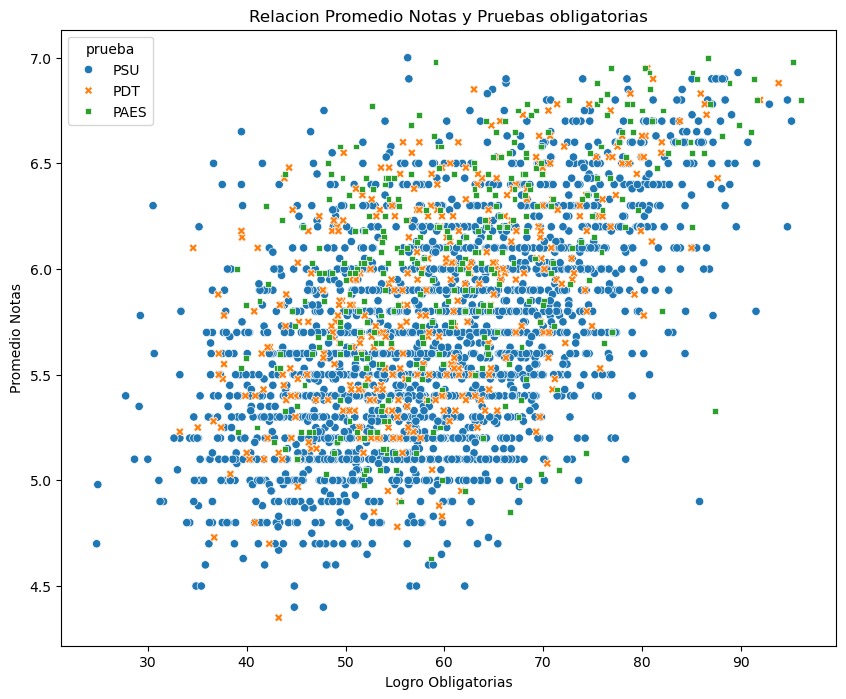

In [68]:
lista = [df_PSU.sample(4000), df_PDT.sample(400), df_PAES.sample(450)]

df_random = pd.concat(lista).reset_index(drop=True)

plt.figure(figsize=(10, 8))

sns.scatterplot(data=df_random, x="%_de_logro_obligatorias", y="promedio_notas",hue="prueba",style="prueba")

plt.title("Relacion Promedio Notas y Pruebas obligatorias")
plt.xlabel("Logro Obligatorias")
plt.ylabel("Promedio Notas")
plt.show()


In [69]:
lista = [df_PSU, df_PDT, df_PAES]

df_final = pd.concat(lista).reset_index(drop=True)

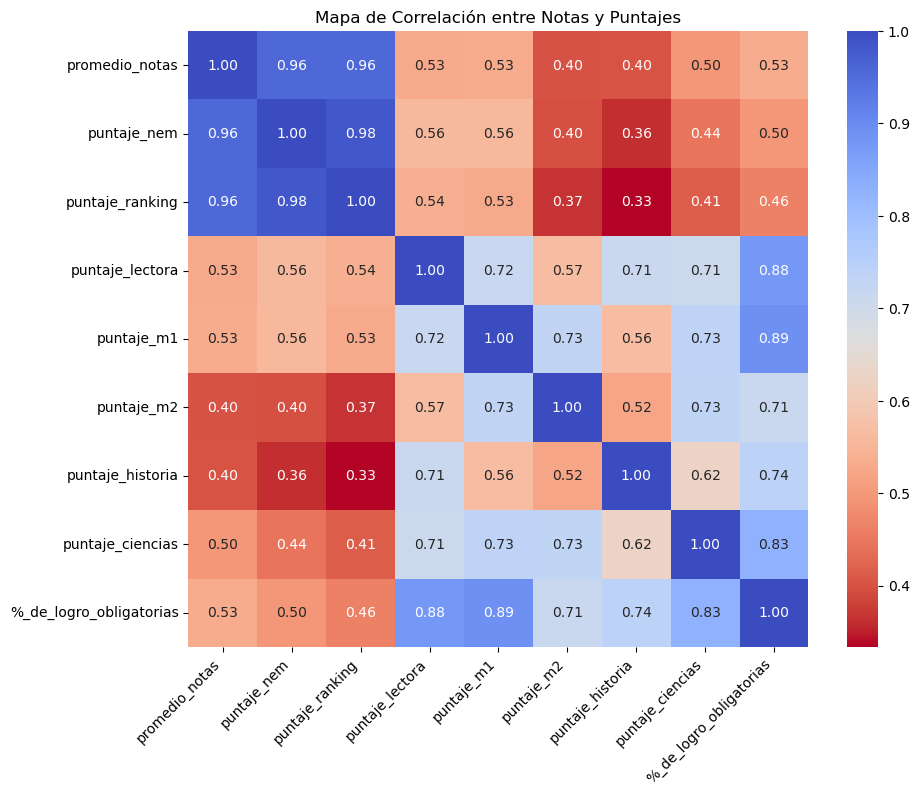

In [70]:
columnas_numericas = [
    'promedio_notas', 'puntaje_nem', 'puntaje_ranking',
    'puntaje_lectora', 'puntaje_m1', 'puntaje_m2',
    'puntaje_historia', 'puntaje_ciencias',"%_de_logro_obligatorias"]

matriz_corr = df_final[columnas_numericas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, fmt='.2f', cmap='coolwarm_r')
plt.title('Mapa de Correlación entre Notas y Puntajes')
plt.xticks(rotation=45, ha='right')
plt.show()

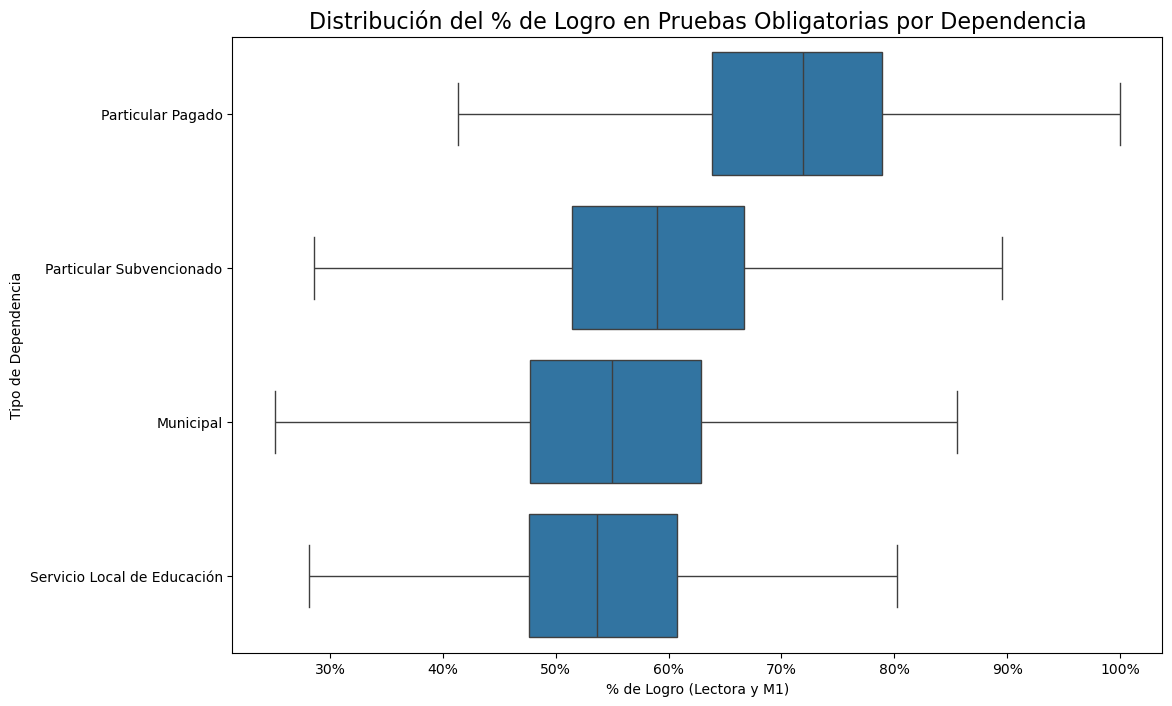

In [71]:
plt.figure(figsize=(12, 8))

order_logro = df_final.groupby('dependencia_colegio')['%_de_logro_obligatorias'].median().sort_values(ascending=False).index

sns.boxplot(
    data=df_final,
    x='%_de_logro_obligatorias',
    y='dependencia_colegio',
    order=order_logro,
    showfliers=False
)

plt.title('Distribución del % de Logro en Pruebas Obligatorias por Dependencia', fontsize=16)
plt.xlabel('% de Logro (Lectora y M1)')
plt.ylabel('Tipo de Dependencia')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.show()

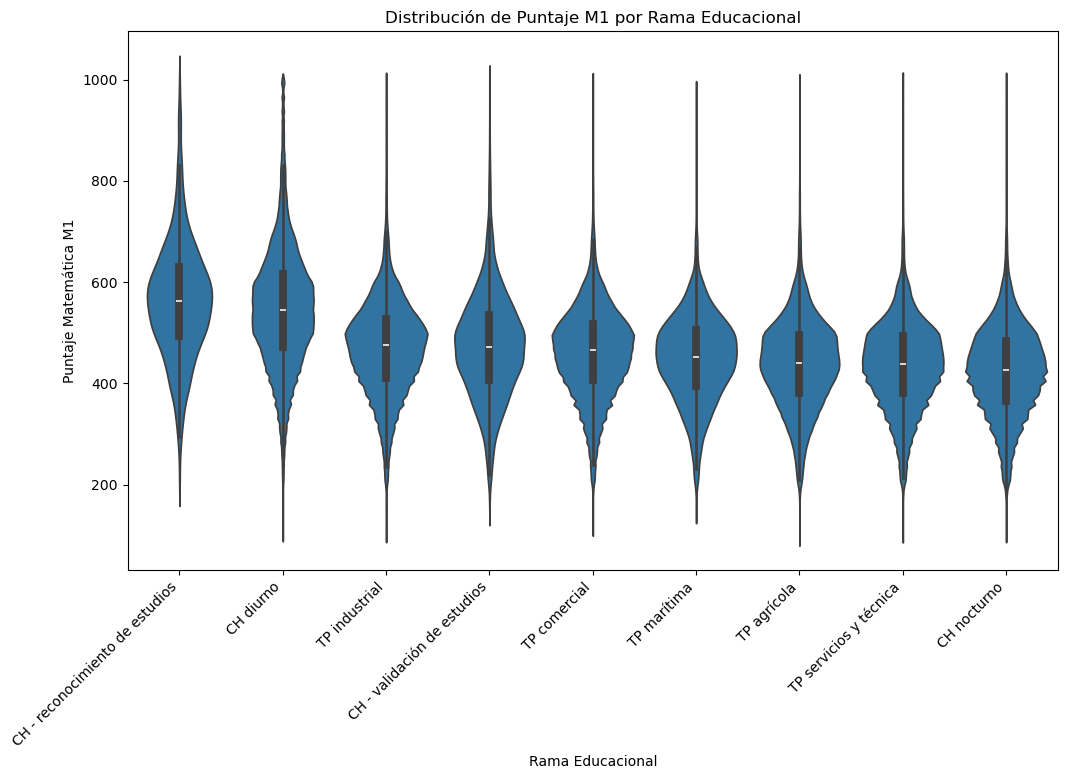

In [72]:
plt.figure(figsize=(12, 7))
sns.violinplot(
    data=df_final, 
    y='puntaje_m1', 
    x='rama_educacional',
    order=df.groupby('rama_educacional')['puntaje_m1'].median().sort_values(ascending=False).index
)
plt.title('Distribución de Puntaje M1 por Rama Educacional')
plt.ylabel('Puntaje Matemática M1')
plt.xlabel('Rama Educacional')
plt.xticks(rotation=45, ha='right')
plt.show()

In [73]:
df_final.columns

Index(['id_estudiante', 'id_colegio_rbd', 'dependencia_colegio',
       'rama_educacional', 'situacion_egreso', 'cod_region', 'cod_comuna',
       'puntaje_lectora', 'puntaje_m1', 'puntaje_historia', 'puntaje_ciencias',
       'tipo_ciencia', 'promedio_notas', 'puntaje_nem', 'year_proceso',
       'puntaje_ranking', 'puntaje_m2', '%_de_logro_obligatorias', 'prueba'],
      dtype='object')

## Análisis en profundidad (Post entrega inicial)
- Una vez finalizada la entrega inicial del repositorio, procedemos a buscar más a fondo respuestas para los objetivos principales de este proyecto. Con el foco en los años 2004 a 2011.

### Preguntas a responder:
- 1. ¿Existen diferencias significativas en torno a los puntajes según el tipo de establecimiento (Municipal, Subvencionado, Particular), se han mantenido a lo largo del tiempo?

- 6. ¿Es posible identificar **perfiles de colegios** que compartan características comunes en su desempeño académico, de forma que algunos establecimientos enseñen resultados similares entre sí y se diferencien de otros grupos de colegios?

In [74]:
df_final.head()

,id_estudiante,id_colegio_rbd,dependencia_colegio,rama_educacional,situacion_egreso,cod_region,cod_comuna,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,promedio_notas,puntaje_nem,year_proceso,puntaje_ranking,puntaje_m2,%_de_logro_obligatorias,prueba
0,id_001160071115,NaN,Municipal,TP comercial,Act:Nacional-Regular,1.0,201.0,469.0,457.0,437.0,426.0,None,6.3,682.0,2004,NaN,<NA>,54.47,PSU
1,id_0016900171627,NaN,Municipal,CH nocturno,Ant:Nacional-Regular,3.0,240.0,492.0,457.0,513.0,<NA>,None,5.3,481.0,2004,NaN,<NA>,55.82,PSU
2,id_0016900571641,NaN,Municipal,TP comercial,Ant:Nacional-Regular,2.0,225.0,391.0,442.0,<NA>,396.0,None,4.8,376.0,2004,NaN,<NA>,49.0,PSU
3,id_0028900472899,NaN,Municipal,CH diurno,Act:Nacional-Regular,8.0,415.0,353.0,487.0,402.0,<NA>,None,4.8,373.0,2004,NaN,<NA>,49.41,PSU
4,id_004500078456,NaN,Particular Subvencionado,CH nocturno,Act:Nacional-Regular,10.0,510.0,430.0,425.0,451.0,<NA>,None,5.4,501.0,2004,NaN,<NA>,50.29,PSU


In [98]:
COLORES_GRAFICOS = {
    'Municipal':                  '#D9534F',  # Rojo suave
    'Particular Subvencionado':   '#F29D25',  # Naranja
    'Particular Pagado':          '#2E8EF6',  # Azul claro
    'Servicio Local de Educación': '#5CB85C'  # Verde (Aparecerá en los años recientes)
}
PRUEBAS = {
    'puntaje_lectora': 'Lectura',
    'puntaje_m1': 'Matemática',
    'puntaje_historia': 'Historia',
    'puntaje_ciencias': 'Ciencias'
}

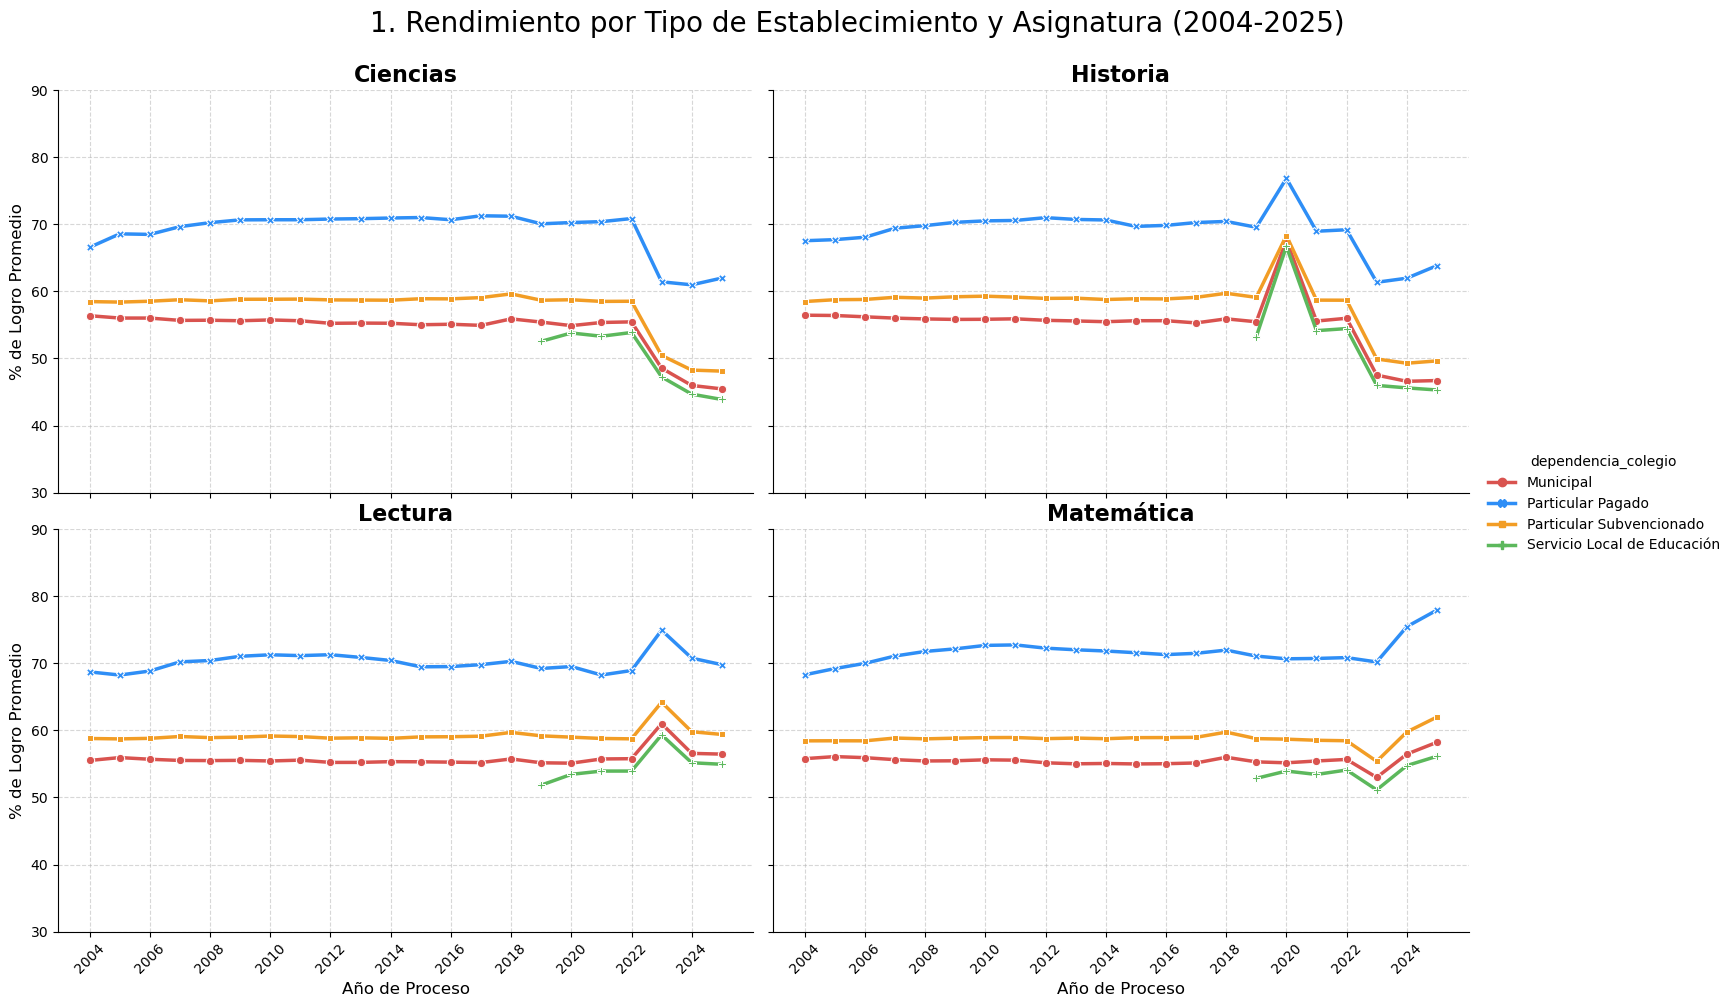

In [ ]:
# maximo posible
#como en 2023 originó la paes, asignamos el maximo posible como 1000 o 850, dependiendo si la condicion es True o False.
df_final['max_posible'] = np.where(df_final['year_proceso'] >= 2023, 1000, 850) 

# Calculamos el % para cada una
for col_original, nombre_nuevo in PRUEBAS.items():
    df_final[nombre_nuevo] = (df_final[col_original] / df_final['max_posible']) * 100

#melteamos para usar 'col="Prueba"' para crear sub-gráficos automáticos
df_long = df_final.melt(
    id_vars=['year_proceso', 'dependencia_colegio'],
    value_vars=list(PRUEBAS.values()),
    var_name='Prueba',
    value_name='Porcentaje_Logro'
)

#agrupo para obtener los promedios anuales y alivianar el gráfico
data_plot = df_long.groupby(['year_proceso', 'dependencia_colegio', 'Prueba'])['Porcentaje_Logro'].mean().reset_index()

#grafico en varios paneles
g = sns.relplot(
    data=data_plot,
    x='year_proceso',
    y='Porcentaje_Logro',
    hue='dependencia_colegio',
    style='dependencia_colegio',
    col='Prueba',
    col_wrap=2,
    kind='line',
    height=5,
    aspect=1.5,
    linewidth=2.5,
    palette=COLORES_GRAFICOS,
    markers=True,
    dashes=False
)

g.set_titles("{col_name}", size=16, fontweight='bold') # Título de cada sub-gráfico
g.set_axis_labels("Año de Proceso", "% de Logro Promedio", fontsize=12)

# Ajustamos los ejes y la rotación para todos los sub-gráficos
for ax in g.axes.flat:
    ax.set_yticks(np.arange(30, 91, 10)) # Eje Y de 10 en 10
    ax.grid(True, linestyle='--', alpha=0.5)
    #ajuste de años en el eje x
    ax.set_xticks(np.arange(data_plot['year_proceso'].min(), data_plot['year_proceso'].max() + 1, 2))
    ax.tick_params(axis='x', rotation=45)

#titulo
plt.subplots_adjust(top=0.9)
g.figure.suptitle('1. Rendimiento por Tipo de Establecimiento y Asignatura (2004-2025)', fontsize=20)

plt.show()


In [ ]:
for col_orig, col_nueva in PRUEBAS.items():
    df_final[col_nueva] = (df_final[col_orig] / df_final['max_posible']) * 100

# Agrupamos solo por dependencia para tener el promedio historico de todo el periodo
cols_materias = list(PRUEBAS.values())
resumen_historico = df_final.groupby('dependencia_colegio')[cols_materias].mean()

print("="*62)
print("PORCENTAJE DE LOGRO PROMEDIO HISTÓRICO (2004-2025)")
print("="*62)

display(resumen_historico.round(2).style.background_gradient(cmap='coolwarm', axis=0).format("{:.2f}%"))

print("\nNota: Este valor representa el rendimiento promedio acumulado de todos los años disponibles.")

PORCENTAJE DE LOGRO PROMEDIO HISTÓRICO (2004-2025)


,Lectura,Matemática,Historia,Ciencias
dependencia_colegio,,,,
Municipal,55.75%,55.49%,55.63%,54.24%
Particular Pagado,70.12%,71.73%,69.16%,68.90%
Particular Subvencionado,59.32%,58.86%,58.37%,57.10%
Servicio Local de Educación,55.02%,54.00%,51.80%,48.75%



Nota: Este valor representa el rendimiento promedio acumulado de todos los años disponibles.


#### Pregunta 1. Síntesis preliminar
En primera instancia podemos visualizar que los procesos de admisión señalan claramente que **los colegios de tipo Particular Pagado** son los que obtienen mejores puntajes en las pruebas de acceso, tenindo gran domiancia sobre otros establecimientos educacionales. Si consideramos que estos establecimientos, en general, tienen acceso a educación de mayor calidad, estos resultados no deberían ser sorpresa de nadie.

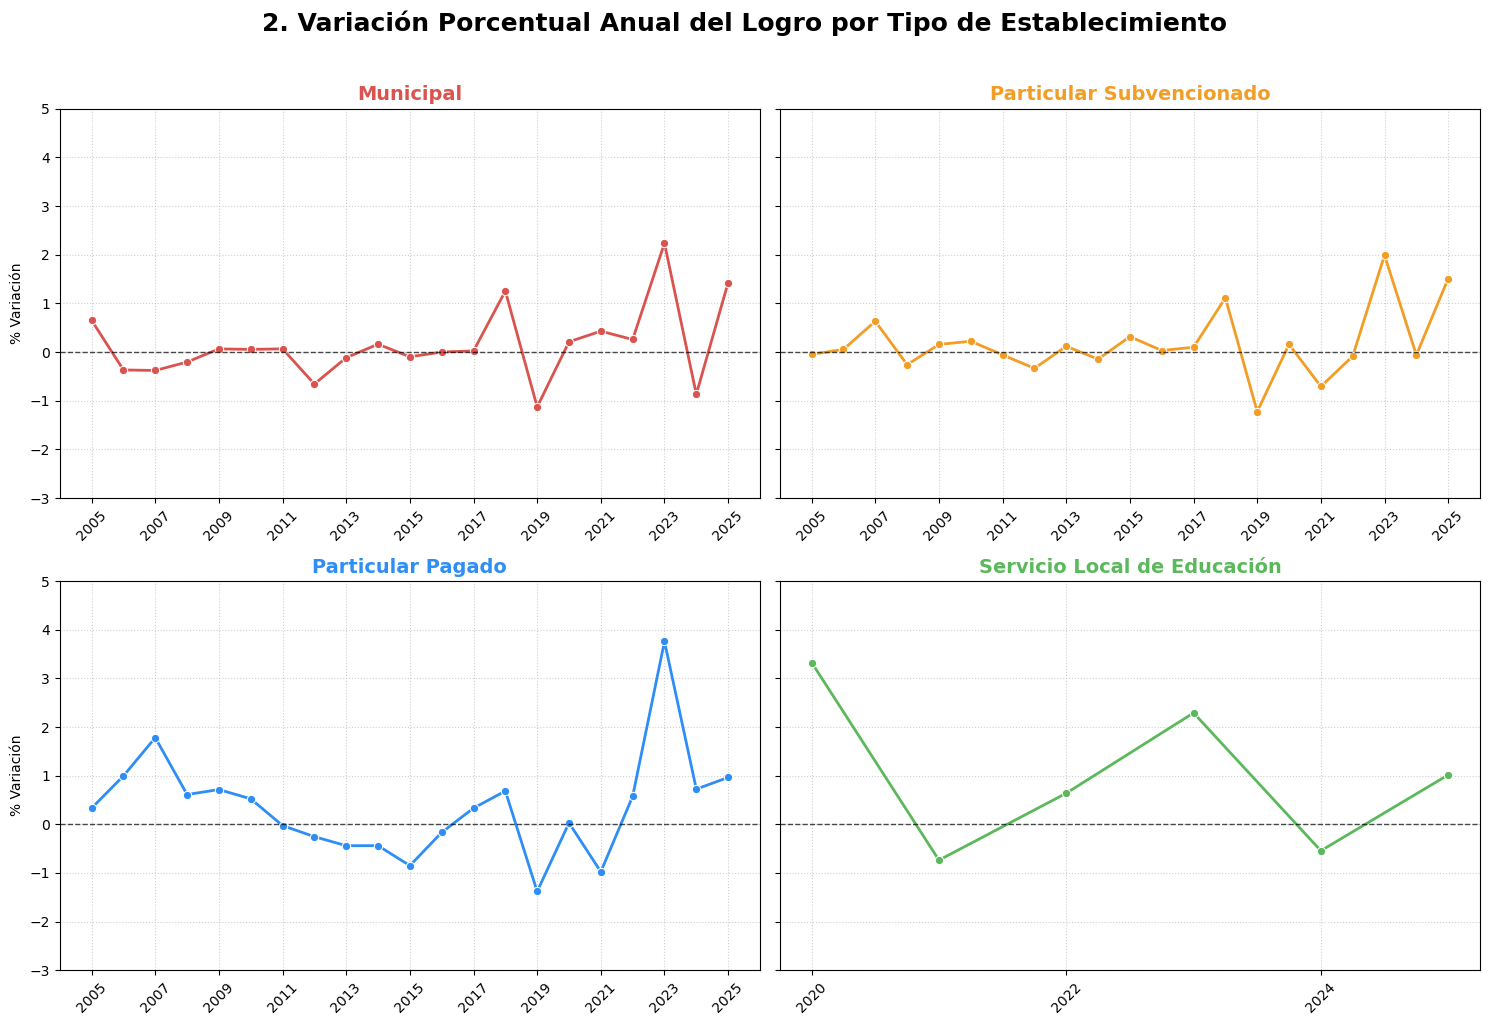

In [ ]:
# 1. PREPARAR DATOS DE VARIACIÓN
# Calculamos el promedio anual
resumen_anual = df_final.groupby(['year_proceso', 'dependencia_colegio'])['%_de_logro_obligatorias'].mean().unstack()

# Calculamos la variación porcentual respecto al año anterior
variacion_anual = resumen_anual.pct_change() * 100

# 2. CONFIGURACIÓN DEL GRÁFICO
dependencias = ['Municipal', 'Particular Subvencionado', 'Particular Pagado', 'Servicio Local de Educación']

mis_colores = {
    'Municipal':                '#D9534F',
    'Particular Subvencionado': '#F29D25',
    'Particular Pagado':        '#2E8EF6',
    'Servicio Local de Educación': '#5CB85C'
}

# Crear figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=False, sharey=True)
fig.suptitle('2. Variación Porcentual Anual del Logro por Tipo de Establecimiento', fontsize=18, fontweight='bold', y=1.02)

axes = axes.flatten() # Aplanar para iterar fácilmente (0, 1, 2, 3)

# 3. GENERAR SUBPLOTS
for i, dependencia in enumerate(dependencias):
    ax = axes[i]
    
    # Filtramos solo si la dependencia existe en los datos
    if dependencia in variacion_anual.columns:
        # Eliminamos NaNs (años sin variación, como el primero)
        data_dep = variacion_anual[dependencia].dropna()
        
        # Graficar línea
        sns.lineplot(
            x=data_dep.index, 
            y=data_dep.values, 
            ax=ax, 
            color=mis_colores.get(dependencia, 'gray'), # Usa el color del dic, o gris si falla
            marker='o', 
            linewidth=2
        )
        
        # Línea de referencia en 0%
        ax.axhline(0, color='black', linewidth=1, linestyle='--', alpha=0.7)
        
        # Título y Etiquetas del Subgráfico
        ax.set_title(dependencia, fontweight='bold', color=mis_colores.get(dependencia, 'black'), fontsize=14)
        ax.set_ylabel('% Variación') if i % 2 == 0 else ax.set_ylabel('') # Solo etiqueta Y en la izquierda
        ax.set_xlabel('')
        ax.grid(True, linestyle=':', alpha=0.6)

        ax.set_ylim(-3, 5) 
        
        # Definimos los ticks para que se vean todos los enteros en ese rango
        # np.arange(-3, 6, 1) crea: [-3, -2, -1, 0, 1, 2, 3, 4, 5]
        ax.set_yticks(np.arange(-3, 6, 1))
        
        # --- AJUSTE DEL EJE X (Años de 2 en 2 y rotados) ---
        if not data_dep.empty:
            min_y = int(data_dep.index.min())
            max_y = int(data_dep.index.max())
            # Ticks cada 2 años
            ax.set_xticks(np.arange(min_y, max_y + 1, 2))
            ax.tick_params(axis='x', rotation=45)
            
plt.tight_layout()
plt.show()

> **Nota:** Un `% Variación` negativo implica que este valor es menor al porcentaje del año anterior.
### Pregunta 1. Conclusión final:
Es claro que cada tipo de establecimiento tiene variaciones en los porcentajes de logro en los distintos procesos de admisión, debido a factores tanto humanos (desempeño generacional de cada establecimiento) o sociales (notar como en **2019, año del estallido social** se tiene la variación negativa más grande). Por otra parte, en términos generales se demuestra la predominancia de los colegios **Particulares Pagados**, lo que indica una gran brecha educacional en Chile.

### Pregúnta 6. Análisis sobre eventuales perfiles de colegios:

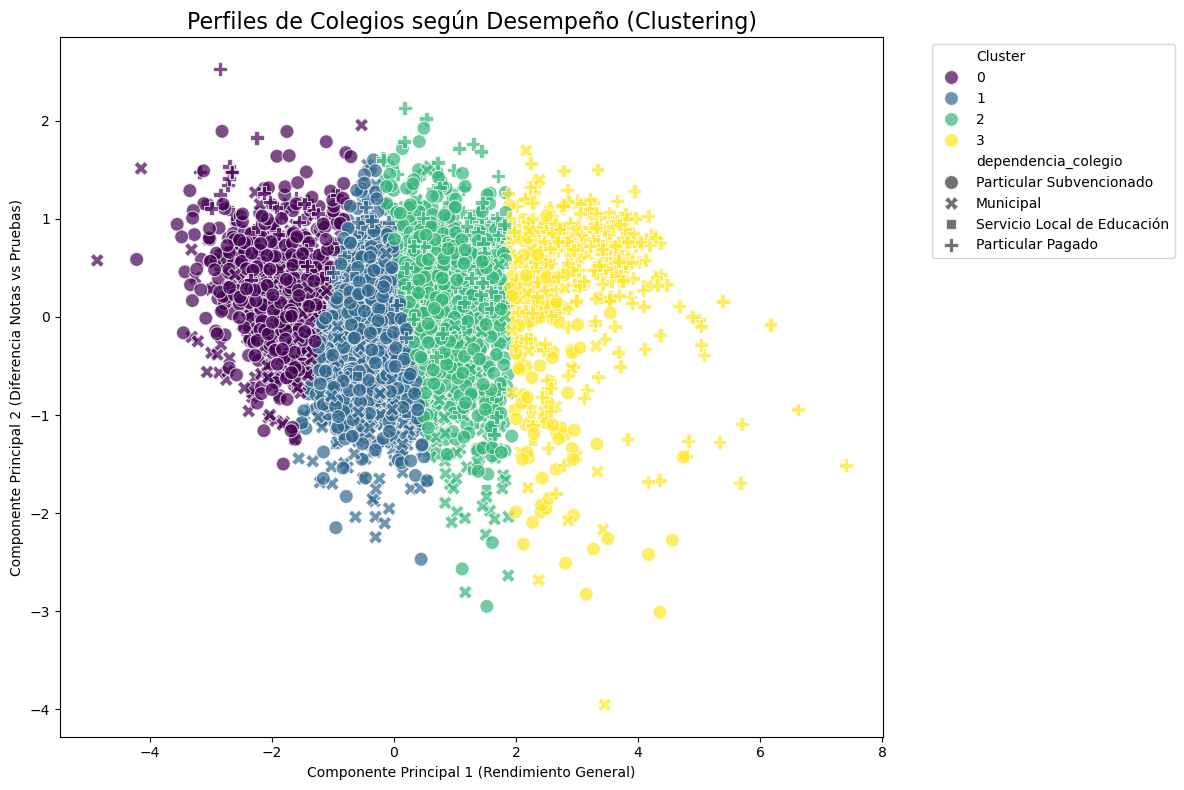

CARACTERÍSTICAS PROMEDIO DE CADA PERFIL:


,%_de_logro_obligatorias,promedio_notas,puntaje_ranking
Cluster,,,
0,50.8,5.47,547.23
1,53.31,5.71,608.01
2,61.58,5.90,646.38
3,70.36,6.19,716.17



¿QUIÉNES COMPONEN CADA PERFIL?


dependencia_colegio,Municipal,Particular Pagado,Particular Subvencionado,Servicio Local de Educación
Cluster,,,,
0,310,43,505,2
1,584,27,737,26
2,169,125,753,7
3,31,294,126,2


In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#selecciono las columna a estudiar vía Clustering para descubrir grupos de colegios
perfil_colegios = df_final.groupby('id_colegio_rbd').agg({
    '%_de_logro_obligatorias': 'mean',  # Tu métrica normalizada
    'promedio_notas': 'mean',
    'puntaje_ranking': 'mean',
    # Moda de la dependencia (por si cambió en los años, tomamos la más frecuente)
    'dependencia_colegio': lambda x: x.mode()[0] if not x.mode().empty else 'Sin Info'
}).dropna()

# Seleccionamos solo las columnas numéricas para el clustering
features = ['%_de_logro_obligatorias', 'promedio_notas', 'puntaje_ranking']
X = perfil_colegios[features]

# estandarizar las medidas para no mal interpretar numeros de valores absolutos tan distintos (puntajes 100-1000, notas 1.0 - 7.0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# CLUSTERING    
# con 4 clusters, buscamos 4 grupos diferentes y dentro de 10 métodos (n_init=10) nos quedamos con el mejor método
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
perfil_colegios['Cluster'] = kmeans.fit_predict(X_scaled)

# forzaos que el clustere=0 sea el de menor rendimiento y el 3ro el de mayor, con esto genero un orden visual en el gráfico
order = perfil_colegios.groupby('Cluster')['%_de_logro_obligatorias'].mean().sort_values().index
mapping = {old: new for new, old in enumerate(order)}
perfil_colegios['Cluster'] = perfil_colegios['Cluster'].map(mapping)

#hacemos el grafico en 2D
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)
perfil_colegios['PC1'] = coords[:, 0]
perfil_colegios['PC2'] = coords[:, 1]

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=perfil_colegios, 
    x='PC1', y='PC2', 
    hue='Cluster', 
    style='dependencia_colegio', # Forma del punto = Dependencia real
    palette='viridis', s=100, alpha=0.7
)
plt.title('Perfiles de Colegios según Desempeño (Clustering)', fontsize=16)
plt.xlabel('Componente Principal 1 (Rendimiento General)')
plt.ylabel('Componente Principal 2 (Diferencia Notas vs Pruebas)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#informacon relevante de los perfiles
print("CARACTERÍSTICAS PROMEDIO DE CADA PERFIL:")
display(perfil_colegios.groupby('Cluster')[features].mean().round(2))

print("\n¿QUIÉNES COMPONEN CADA PERFIL?")
# Tabla cruzada: Cluster vs Dependencia Real
display(pd.crosstab(perfil_colegios['Cluster'], perfil_colegios['dependencia_colegio']))

### Síntesis pregunta 6, Perfiles de colegios:
Gracias a los clusters, podemos identificar **3 tipos de grupos principales**:
1. **Elite Académica (Alto Rendimiento)** Este grupo (que está representado mayoritariamente por el Cluster 2/Amarillo) se caracteriza por exhibir los indicadores más altos tanto en las pruebas de adisión como en notas internas (NEM y Ranking). Lo más distintivo de este perfil es su homogeneidad, dado que está compuesto casi exclusivamente por colegios Particulares Pagados. Lo que sigue demostrando la brecha educativa enunciada en en análisis de la pregunta 1.

1. **Perfil de Transición o Desempeño Medio** Los Clusters 1 y 3 / Turquesa y Verde, es un segmento que actúa como puente entre los extremos. Este perfil está **dominado** principalmente por los establecimientos **Particulares Subvencionados**. Si bien logran despegarse significativamente de los resultados de la educación pública, sus datos muestran un "techo" visible: aunque tienen un rendimiento sólido, rara vez logran pertenecer a lo alto de la pirámide. Este grupo representa a la clase media del sistema educativo, con aspiraciones al sector de los colegios privados.

1. **Perfil de Desafío Estructural** En el extremo izquierdo del gráfico se consolida el grupo más numeroso y con mayores desafíos, el Cluster 0 / Morado, caracterizado por los puntajes de logro más bajos. Este perfil agrupa masivamente a la Educación Pública, tanto a los colegios Municipales tradicionales como a los nuevos Servicios Locales de Educación.

Fialmente, todo este proceso respalda la evidente brecha educacional existente en Chile, donde (en general) la mayoría del buen desempeño académico corresponde a alumnos los cuales sus grupos familiares pueden acceder a educación de alto valor económico.